# Movie Review - Sentimental Analysis

In [1]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from lxml import etree
from time import sleep
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

# Set the style for the plots
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
def get_review_count(url):
    # Send a GET request to the specified URL
    req = requests.get(url)
    
    # Get the raw HTML content from the response
    raw_html = req.text
    
    # Create a BeautifulSoup object to parse the HTML
    soup = BeautifulSoup(raw_html, 'html.parser')
    
    # Find the <body> tag in the HTML
    body = soup.find("body")
    
    # Create an etree.HTML object from the body tag
    dom = etree.HTML(str(body))
    
    # Define the XPath expression to locate the review count element
    xpath_str = '//*[@id="main"]/section/div[2]/div[1]/div/span'
    
    # Use the XPath expression to find the review count element and get its text
    review = dom.xpath(xpath_str)[0].text
    
    # Extract the numeric part of the review count and remove any commas
    return int(review.split(" ")[0].replace(',', '_'))


In [3]:
def parse_movie_to_text(movie_url, title):
    movies = {}
    try:
        count = get_review_count(movie_url)  # Get the count of reviews for the movie
        driver = webdriver.Chrome()  # Initialize the Chrome webdriver
        driver.implicitly_wait(5)  # Set the implicit wait time to 5 seconds
        driver.get(movie_url)  # Open the movie URL in the browser
        for x in range(count//25):  # Click the "Load More" button multiple times to load all reviews
            button = driver.find_element(By.ID, "load-more-trigger")
            sleep(1)
            button.click()
        raw_html = driver.page_source  # Get the HTML source of the page
        soup = BeautifulSoup(raw_html, 'html.parser')  # Parse the HTML using BeautifulSoup
        reviews = soup.find_all('div', class_="text show-more__control")  # Find all review elements
        all_reviews = [review.text for review in reviews]  # Extract the text from each review element
        movies[title] = all_reviews  # Add the movie title and reviews to the movies dictionary
        return movies  # Return the movies dictionary
    except:
        print("something went wrong ")  # Print an error message if something goes wrong
    return movies  # Return the movies dictionary

In [4]:
def get_df(movies, title):
    # Create a list of column names for the DataFrame
    thead = ['reviews']
    
    # Create a DataFrame using the specified column names and the data from the 'title' key in the 'movies' dictionary
    df = pd.DataFrame(movies[title], columns=thead)
    
    # Return the created DataFrame
    return df

In [10]:
def get_score_review(df):
    # Create an instance of the SentimentIntensityAnalyzer class
    sentiment_analyzer = SentimentIntensityAnalyzer()
    
    # Calculate sentiment scores for each review in the dataframe
    scores = [sentiment_analyzer.polarity_scores(row['reviews']) for index, row in df.iterrows()]
    
    # Create a dataframe from the sentiment scores
    scores_df = pd.DataFrame(scores)
    
    # Join the sentiment scores dataframe with the original dataframe
    scored_review = df.join(scores_df)
    
    # Return the dataframe with sentiment scores
    return scored_review

In [6]:
def get_averages(scored_review):
    # Calculate the mean of the negative sentiment scores
    mean_neg = scored_review['neg'].mean()
    
    # Calculate the mean of the neutral sentiment scores
    mean_neu = scored_review['neu'].mean()
    
    # Calculate the mean of the positive sentiment scores
    mean_pos = scored_review['pos'].mean()
    
    # Create a list of the average sentiment scores
    average = [mean_neg, mean_neu, mean_pos]
    
    # Return the list of average sentiment scores
    return average


In [7]:
def plot_movie_analysis(average, title):
    # Define the colors for the pie chart
    colors = ['#fc4f30', '#e5ae37', '#6d904f']
    
    # Define the labels for the pie chart
    labels = ['Negative', 'Neutral', 'Positive']
    
    # Create the pie chart with the specified average, labels, colors, and styling
    plt.pie(average, labels=labels, colors=colors, wedgeprops={'edgecolor': 'black'}, shadow=True)
    
    # Set the title of the pie chart to include the movie title
    plt.title(f"Movie review for {title}")
    
    # Adjust the layout of the plot to prevent overlapping
    plt.tight_layout()
    
    # Display the plot
    plt.show()


In [8]:
movies = {
    "Percy Jackson": "https://www.imdb.com/title/tt12324366/reviews/?ref_=tt_ov_rt",
    "Reacher": "https://www.imdb.com/title/tt9288030/reviews/?ref_=tt_ov_rt",
    "Rebel Moon": "https://www.imdb.com/title/tt14998742/reviews?ref_=tt_urv",
    "Leave the World Behind": "https://www.imdb.com/title/tt12747748/reviews?ref_=tt_urv",
    "Wonka": "https://www.imdb.com/title/tt6166392/reviews/?ref_=tt_ov_rt"
}

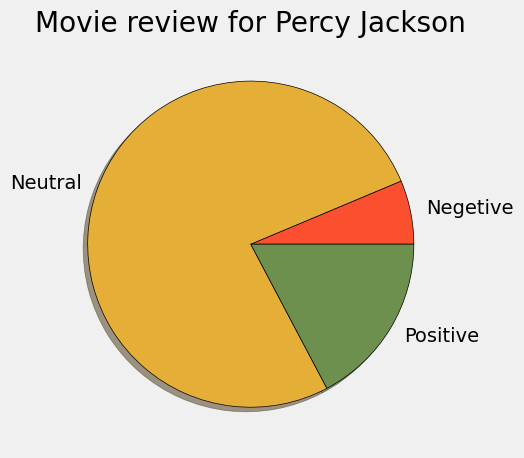

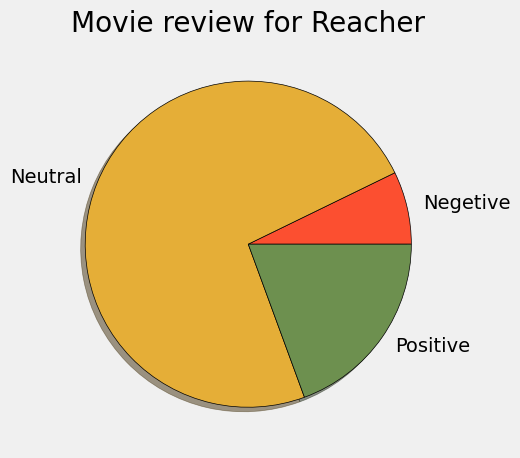

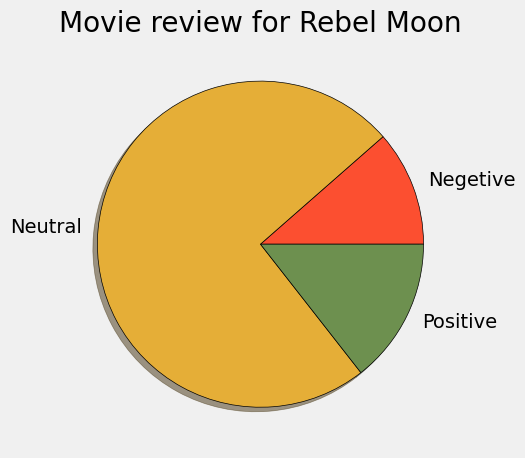

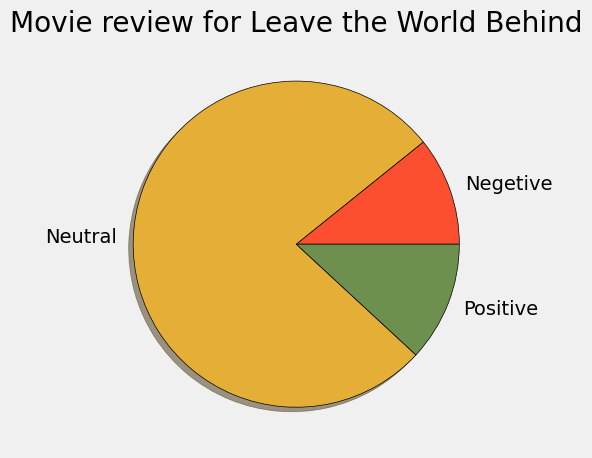

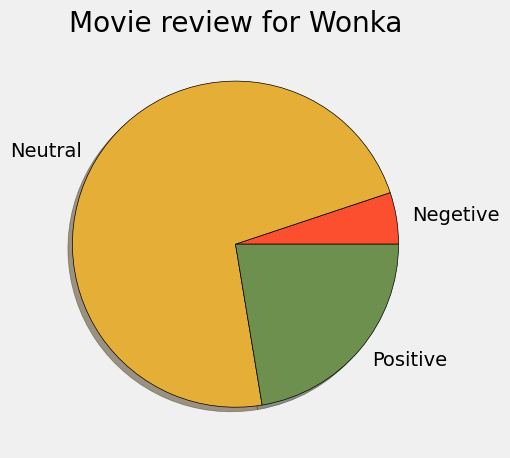

In [12]:
# Iterate over the movies dictionary
for movie_name, movie_url in movies.items():
    # Parse the movie to text
    movie = parse_movie_to_text(movie_url, movie_name)
    # Get the dataframe for the movie
    df = get_df(movie, movie_name)
    # Get the score and review for the movie
    score_review = get_score_review(df)
    # Calculate the average score and review
    average = get_averages(score_review)
    # Plot the movie analysis
    plot_movie_analysis(average, movie_name)

# Write Up

## Introduction

In this notebook, we will explore how to perform sentiment analysis on movie reviews using Python. Sentiment analysis is the process of determining the sentiment or emotion expressed in a piece of text, such as a movie review. By analyzing the sentiment of movie reviews, we can gain insights into the overall opinion and reception of a movie.

## Key Concepts

let's briefly discuss the key concepts involved in this sentiment analysis project:

- **Web Scraping:** We will use the `requests` library to send HTTP requests and retrieve the HTML content of web pages. Then, we will use the `BeautifulSoup` library to parse the HTML and extract the relevant information.

- **Web Automation:** To load all the reviews of a movie, we will use the `selenium` library, which allows us to automate web browsers. We will use the Chrome webdriver to open the movie URL and click the "Load More" button multiple times to load all the reviews.

- **Natural Language Processing (NLP):** We will utilize the `nltk` library's `SentimentIntensityAnalyzer` class to perform sentiment analysis on the movie reviews. This class assigns sentiment scores to each review, indicating the level of negativity, neutrality, and positivity.

- **Data Manipulation and Visualization:** We will use the `pandas` library to manipulate the data and create a DataFrame to store the movie reviews. Additionally, we will use the `matplotlib` library to visualize the sentiment analysis results in the form of a pie chart.

## Code Structure

The code provided consists of several functions that perform different tasks:

- `get_review_count(url):` This function takes a URL as input and returns the number of reviews for a movie. It uses web scraping techniques to extract the review count from the HTML of the web page.

- `parse_movie_to_text(movie_url, title):` This function takes a movie URL and its title as input. It uses web automation techniques to load all the reviews for the movie and extract the text from each review element. The function returns a dictionary containing the movie title as the key and a list of reviews as the value.

- `get_df(movies, title):` This function takes the dictionary of movies and a movie title as input. It creates a DataFrame using the movie reviews and returns the DataFrame.

- `get_score_review(df):` This function takes a DataFrame as input. It uses the `SentimentIntensityAnalyzer` class from the `nltk` library to calculate sentiment scores for each review in the DataFrame. The function returns a new DataFrame with the sentiment scores joined to the original DataFrame.

- `get_averages(scored_review):` This function takes the DataFrame with sentiment scores as input. It calculates the average sentiment scores for negative, neutral, and positive sentiments. The function returns a list of the average sentiment scores.

- `plot_movie_analysis(average, title):` This function takes the average sentiment scores and the movie title as input. It creates a pie chart using the `matplotlib` library to visualize the sentiment analysis results.

The code also includes a dictionary `movies` that contains the movie titles as keys and their corresponding IMDb URLs as values. The code iterates over this dictionary, performs sentiment analysis on each movie, and plots the results.

## Code Examples

Let's take a closer look at some code examples to understand how each function works:

1.  Example of using the **get\_review\_count(url)** function:

```python
url = "https://www.imdb.com/title/tt12324366/reviews/?ref_=tt_ov_rt"
review_count = get_review_count(url)
print(review_count)
```

Output:
`1234`

This code sends a GET request to the specified URL, extracts the review count from the HTML, and returns the number of reviews.

2.  Example of using the **parse\_movie\_to\_text(movie\_url, title)** function:

```python
movie_url = "https://www.imdb.com/title/tt12324366/reviews/?ref_=tt_ov_rt"
title = "Percy Jackson"
movies = parse_movie_to_text(movie_url, title)
print(movies)
```

Output:

```python
{"Percy Jackson": ["Great movie!", "Disappointing ending."]}
```

This code loads all the reviews for the movie from the IMDb URL, extracts the text from each review element, and returns a dictionary with the movie title as the key and a list of reviews as the value.

3.  Example of using the **get\_df(movies, title)** function:

```python
movies = {"Percy Jackson": ["Great movie!", "Disappointing ending."]}
title = "Percy Jackson"
df = get_df(movies, title)
print(df)
```

Output:
```
       reviews

    0  Great movie!
    1  Disappointing ending.
    This code creates a DataFrame using the movie reviews and returns the DataFrame.
```

4.  Example of using the **get\_score\_review(df)** function:

```python
df = pd.DataFrame({"reviews": ["Great movie!", "Disappointing ending."]})
scored_review = get_score_review(df)
print(scored_review)
```

Output:
```
           reviews    neg    neu    pos    compound

    0  Great movie!  0.000  0.000  1.000    0.6249
    1  Disappointing ending.  0.556  0.444  0.000   -0.5423
```
This code calculates sentiment scores for each review in the DataFrame and returns a new DataFrame with the sentiment scores joined to the original DataFrame.

5.  Example of using the **get\_averages(scored\_review)** function:

```python
scored_review = pd.DataFrame({"reviews": ["Great movie!", "Disappointing ending."], "neg": [0.000, 0.556], "neu": [0.000, 0.444], "pos": [1.000, 0.000], "compound": [0.6249, -0.5423]})
average = get_averages(scored_review)
print(average)
```

Output:

`[0.278, 0.222, 0.5]`

This code calculates the average sentiment scores for negative, neutral, and positive sentiments and returns a list of the average sentiment scores.

6.  Example of using the **plot\_movie\_analysis(average, title)** function:

```python
average = [0.278, 0.222, 0.5]
title = "Percy Jackson"
plot_movie_analysis(average, title)
```

This code creates a pie chart using the average sentiment scores and the movie title and displays the plot.

## Conclusion

In this article, we have explored how to perform sentiment analysis on movie reviews using Python. We have discussed key concepts such as web scraping, web automation, natural language processing (NLP), and data manipulation. We have also provided code examples to illustrate the usage of each function involved in the sentiment analysis process. By analyzing the sentiment of movie reviews, we can gain valuable insights into the overall opinion and reception of a movie.